In [49]:
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import itertools


1. CA of syngas fossil

              Category     Score         Exchange  Contribution
0  Acidification (Ae)   0.418488           syngas     91.628037
1  Acidification (Ae)   0.000122         heat CHP      0.026659
2  Acidification (Ae)   0.000141  electricity CHP      0.030868
3  Acidification (Ae)   0.036700         syncrude      8.035374
4  Acidification (Ae)   0.001275               H2      0.279065


<Figure size 1500x800 with 0 Axes>

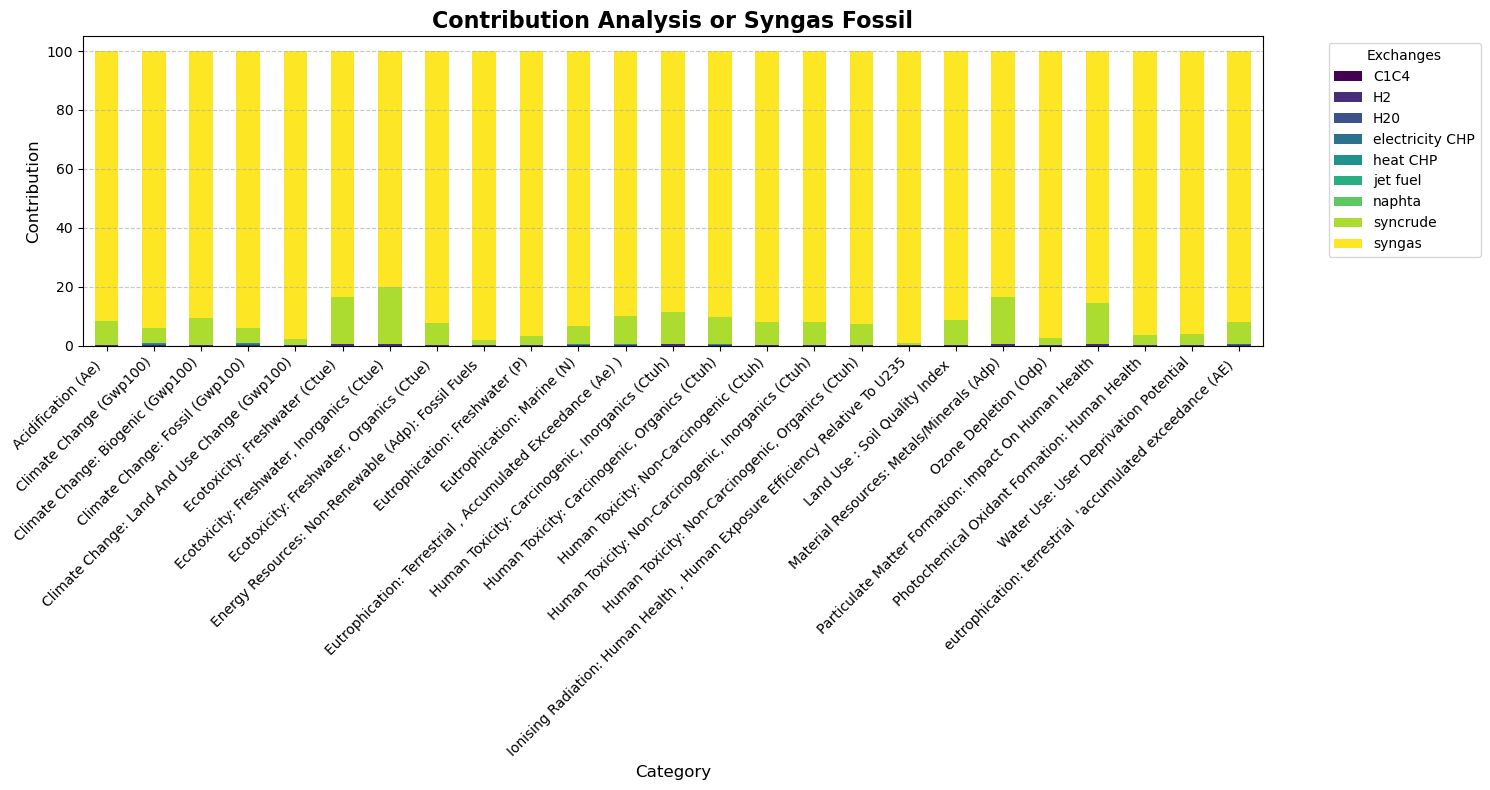

In [59]:
# Load the Excel data
file_path = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\data\contribution_analysis_results_fossil.csv"
data = pd.read_csv(file_path)

# Check the data structure to ensure correct loading
print(data.head())

# Pivot the data to prepare for stacked bar plot
pivot_data = data.pivot_table(
    index='Category',   # Corrected capitalization
    columns='Exchange', # Corrected capitalization
    values='Contribution', # Corrected capitalization
    aggfunc='sum',
    fill_value=0
)

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
ax = pivot_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(15, 8))

# Customize the chart
plt.title("Contribution Analysis or Syngas Fossil", fontsize=16, weight='bold')
plt.ylabel("Contribution", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Exchanges", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Define the output directory
output_dir = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\plots"
os.makedirs(output_dir, exist_ok=True)

# Save the plot
plot_path = os.path.join(output_dir, "CA_Syngas_fossil.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


1.b SCA of syngas fossil 

       Impact Category     Score  \
0  Acidification (Ae)   0.034121   
1  Acidification (Ae)   0.033352   
2  Acidification (Ae)   0.031626   
3  Acidification (Ae)   0.022002   
4  Acidification (Ae)   0.021863   

                                         Process  
0              Electricity Production, Hard Coal  
1                Electricity Production, Lignite  
2        Heat And Power Co-Generation, Hard Coal  
3  Transport, Freight, Sea, Tanker For Petroleum  
4                Electricity Production, Lignite  


C:\Users\matal\AppData\Local\Temp\ipykernel_33764\3818677161.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

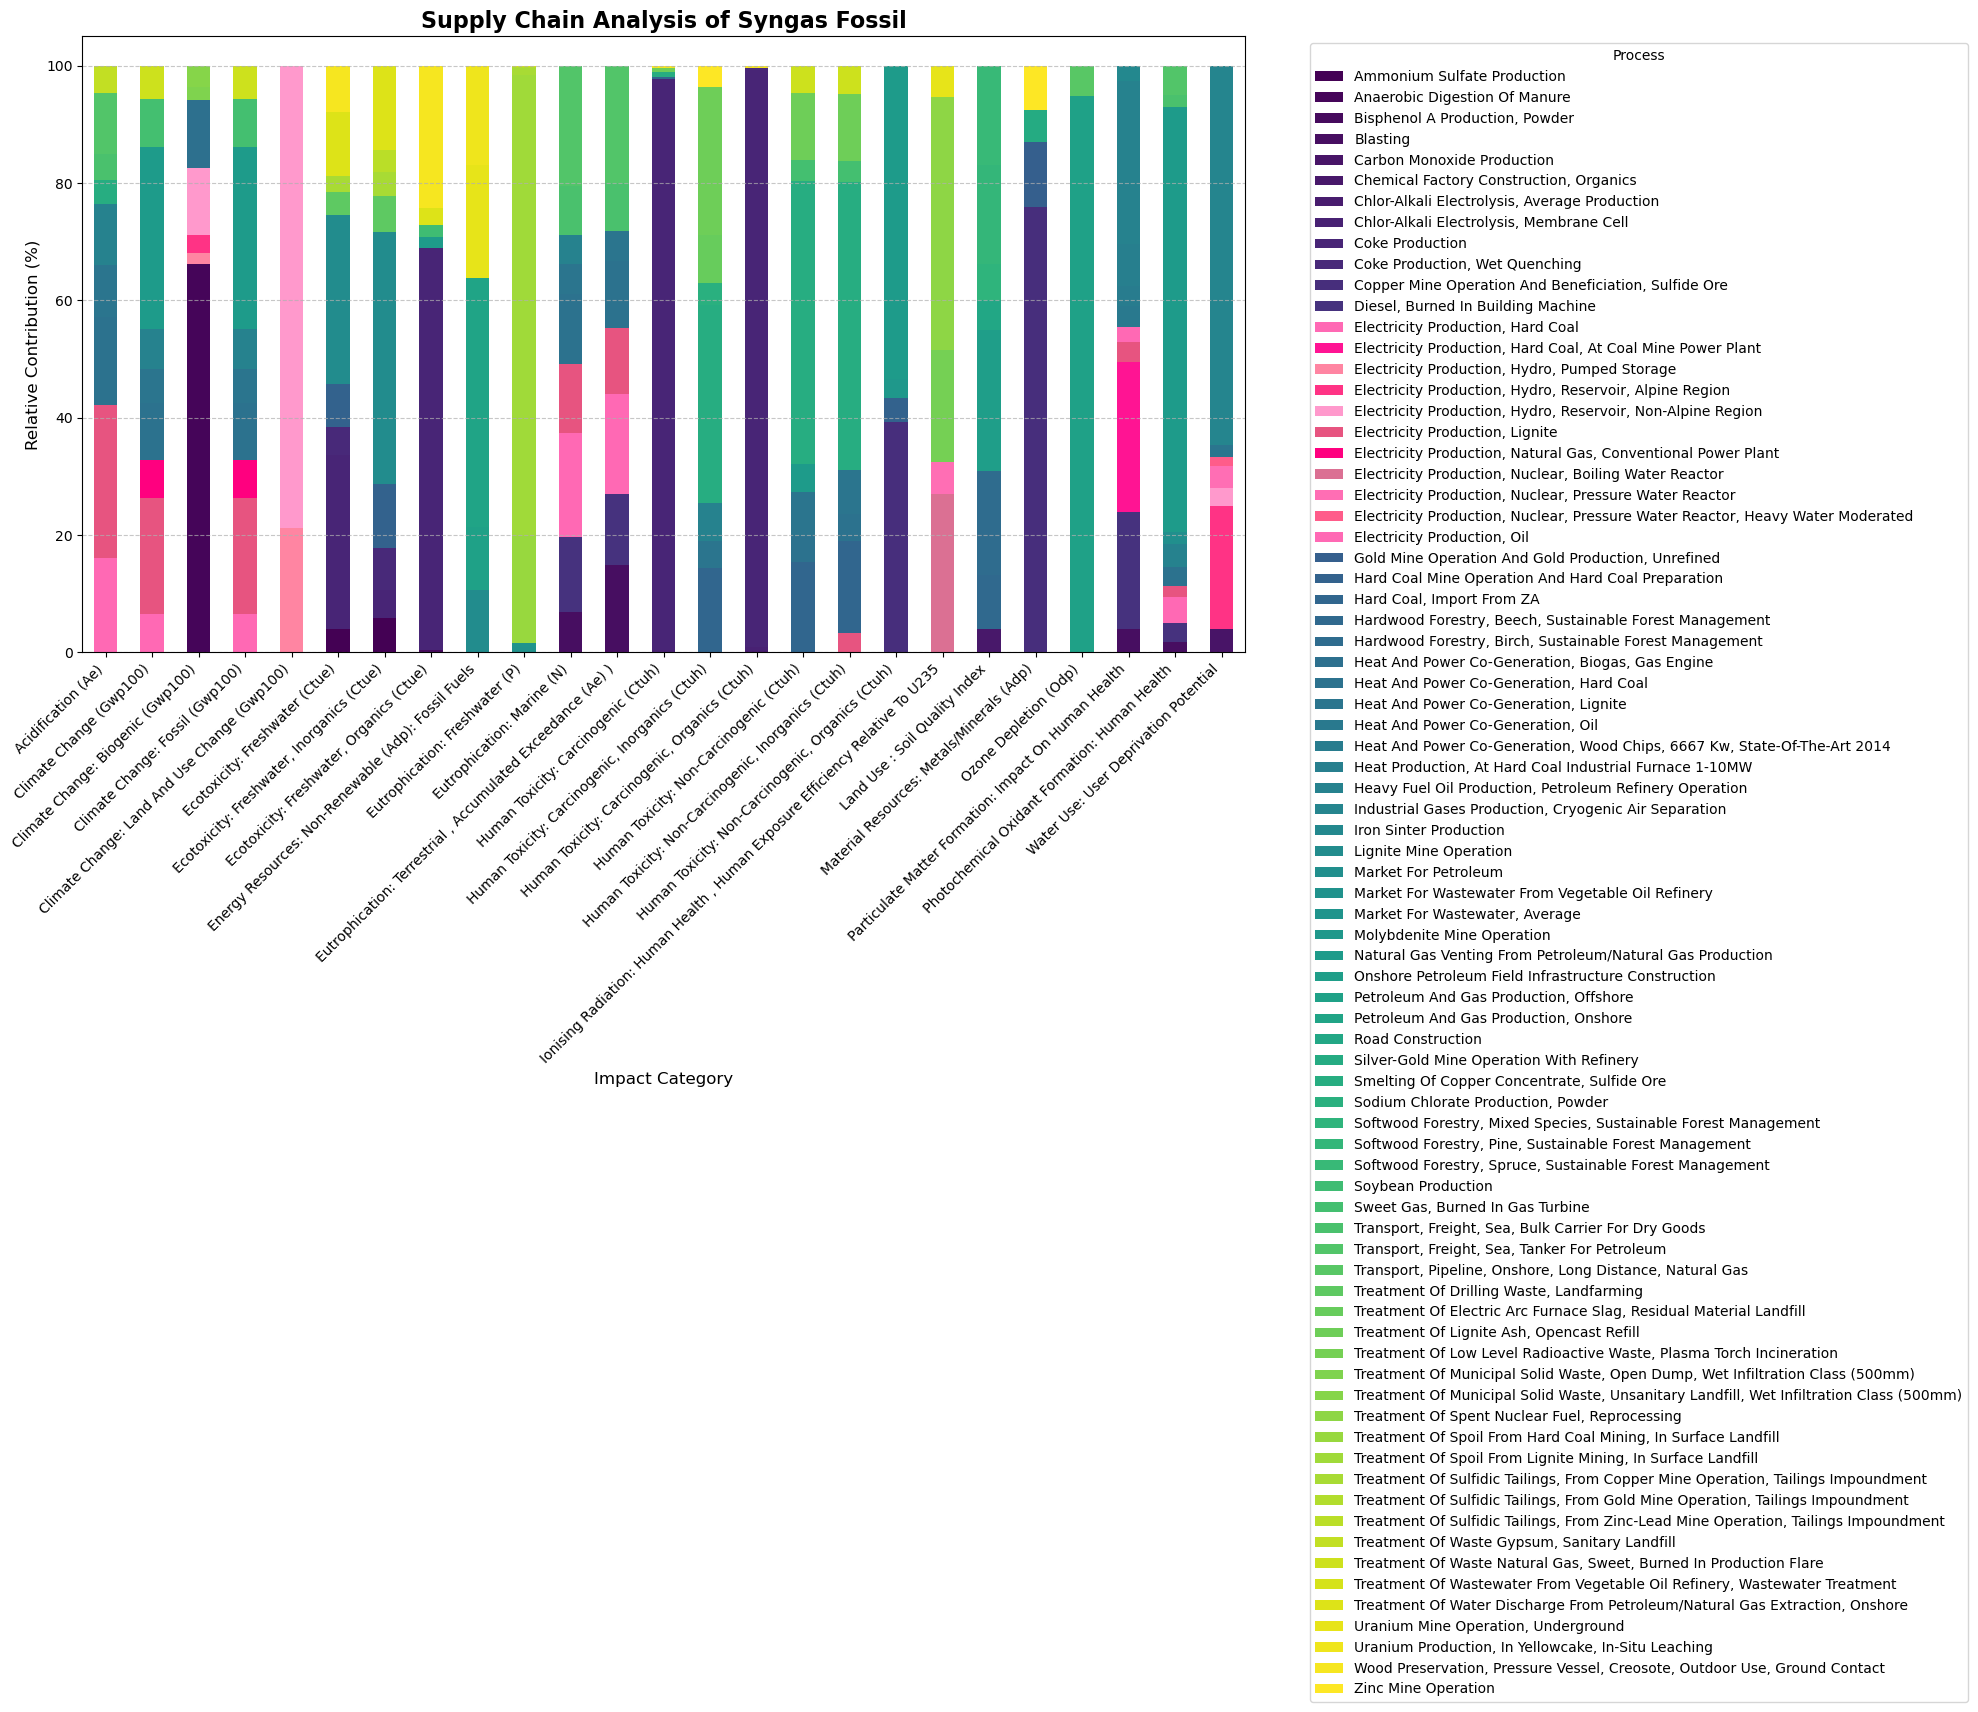

In [55]:
# Load the Excel data
file_path = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\data\supply_chain_analysis_results_fossil.csv"
data = pd.read_csv(file_path)


# Check the data structure to ensure correct loading
print(data.head())

# Clean Impact Category names by removing specific patterns
data['Impact Category'] = data['Impact Category'].str.replace(r"\('EF v3\.1 no LT',|no LT'\)", "", regex=True).str.strip()

# Pivot the data to prepare for stacked bar plot
pivot_data = data.pivot_table(
    index='Impact Category',   # Corrected capitalization
    columns='Process',  # Updated to match the new column
    values='Score',     # Updated to match the new column
    aggfunc='sum',
    fill_value=0
)

# Normalize the data to calculate relative contributions (percentage)
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Define the output directory
output_dir = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\plots"
os.makedirs(output_dir, exist_ok=True)

# Define custom colors for processes
import matplotlib.colors as mcolors
original_colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_data.columns)))
colors = []
pink_shades = ["#ff69b4", "#ff1493", "#ff85a2", "#ff3385", "#ff99cc", "#e75480", "#ff007f", "#db7093", "#ff6eb4", "#ff5c8a"]  # Expanded range of pink shades
pink_index = 0
for i, process in enumerate(pivot_data.columns):
    if 'electricity' in process.lower():
        colors.append(pink_shades[pink_index % len(pink_shades)])  # Cycle through pink shades
        pink_index += 1
    else:
        colors.append(original_colors[i])  # Keep original colors for other processes

# Plot the stacked bar chart
plt.figure(figsize=(15, 8))
ax = pivot_data_normalized.plot(kind='bar', stacked=True, color=colors, figsize=(15, 8))

# Customize the chart
plt.title("Supply Chain Analysis of Syngas Fossil", fontsize=16, weight='bold')
plt.ylabel("Relative Contribution (%)", fontsize=12)
plt.xlabel("Impact Category", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Process", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plot_path = os.path.join(output_dir, "supply_chain_analysis_syngas_fossil.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()


Tryout w nicer colors

2. Analysis syngas: Polarcharts for MultiLCA

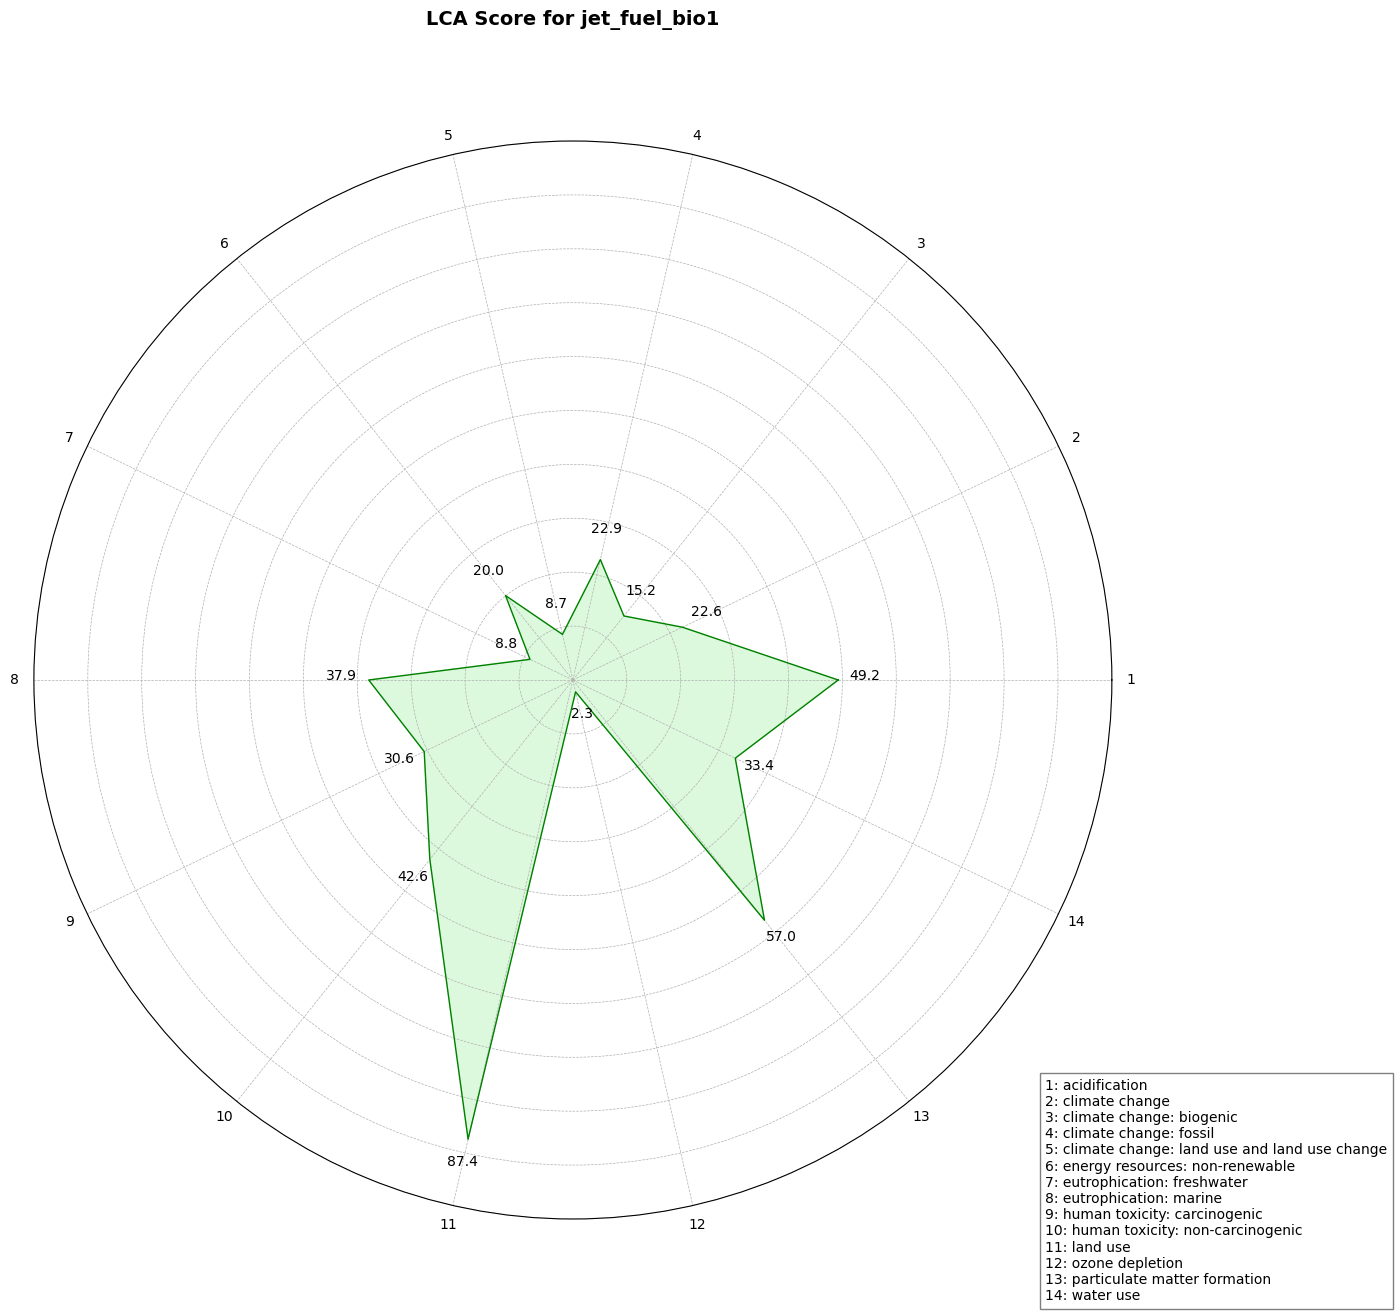

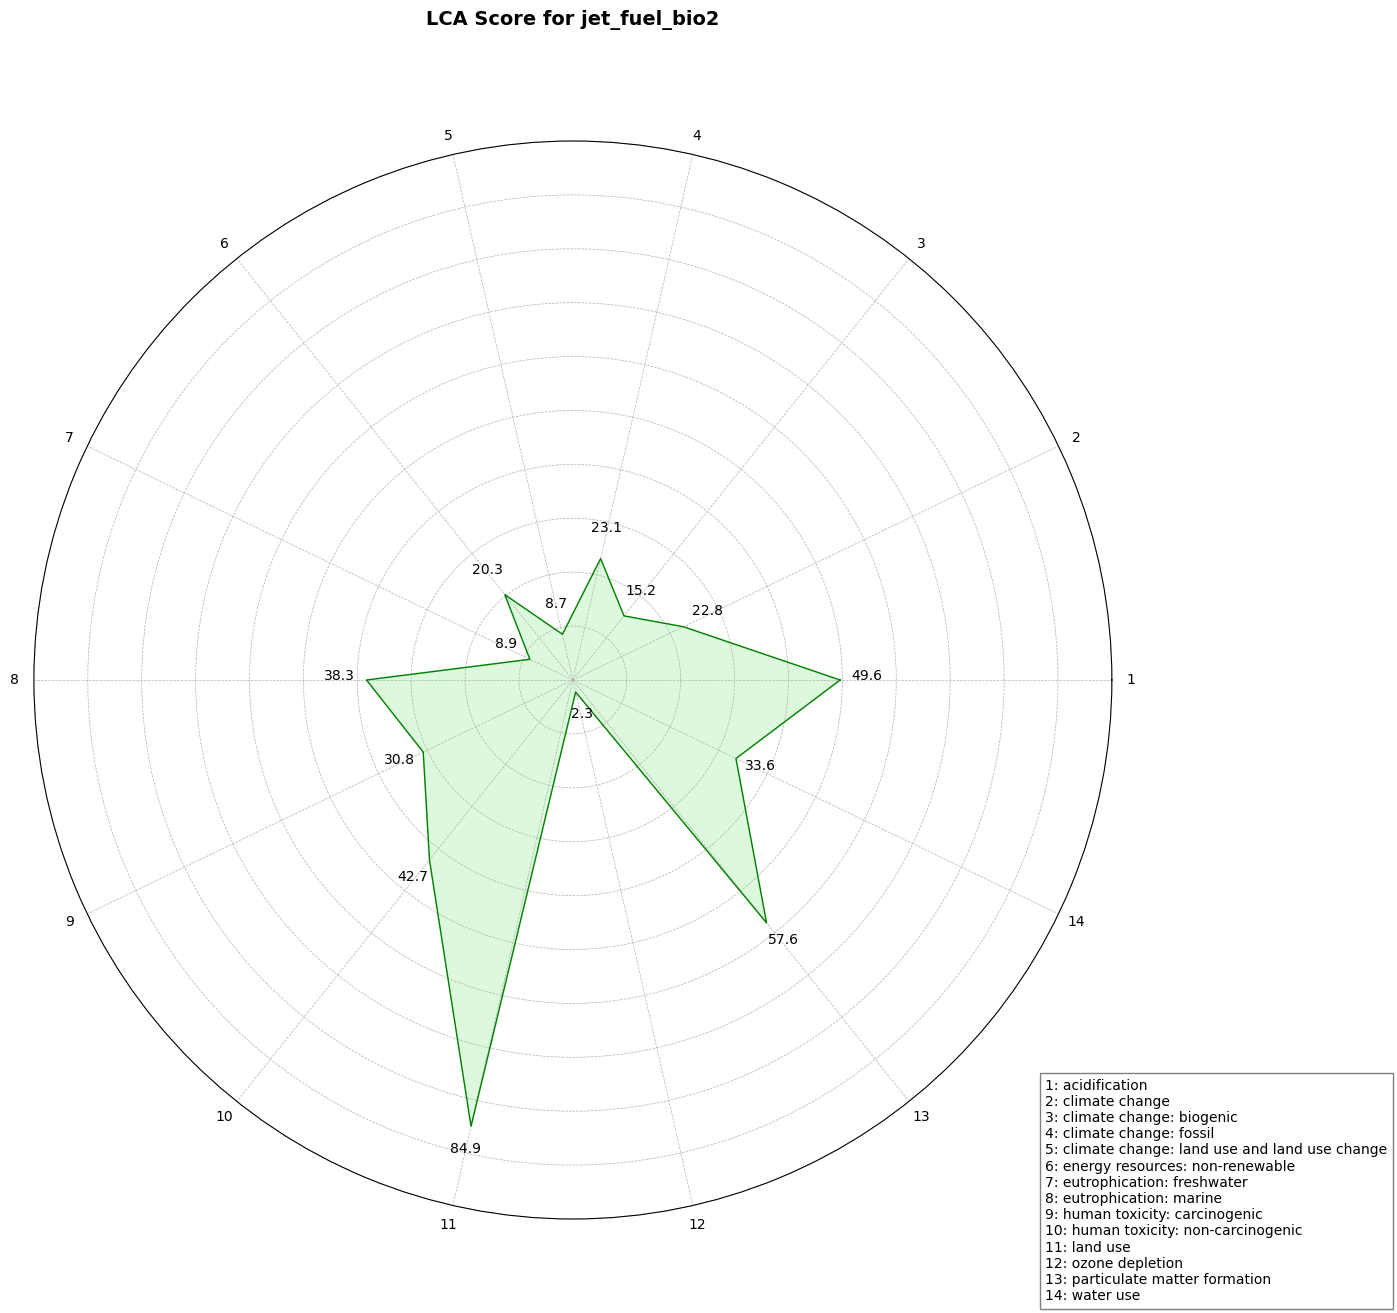

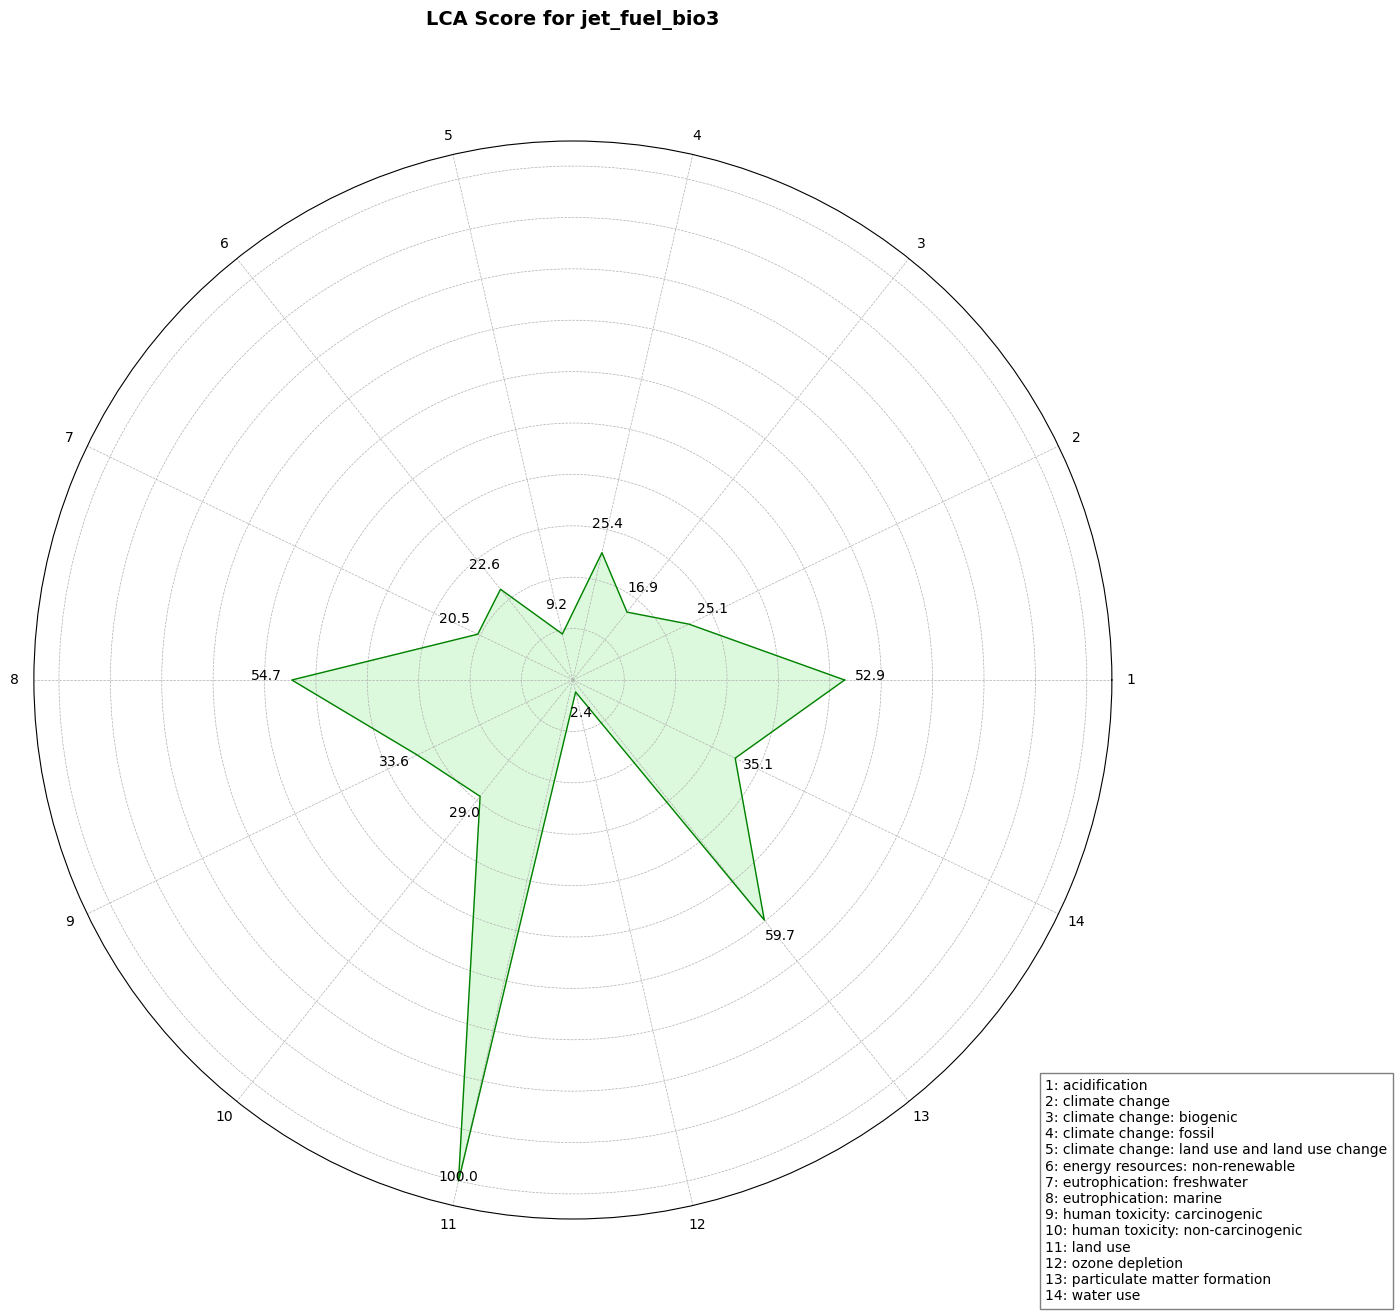

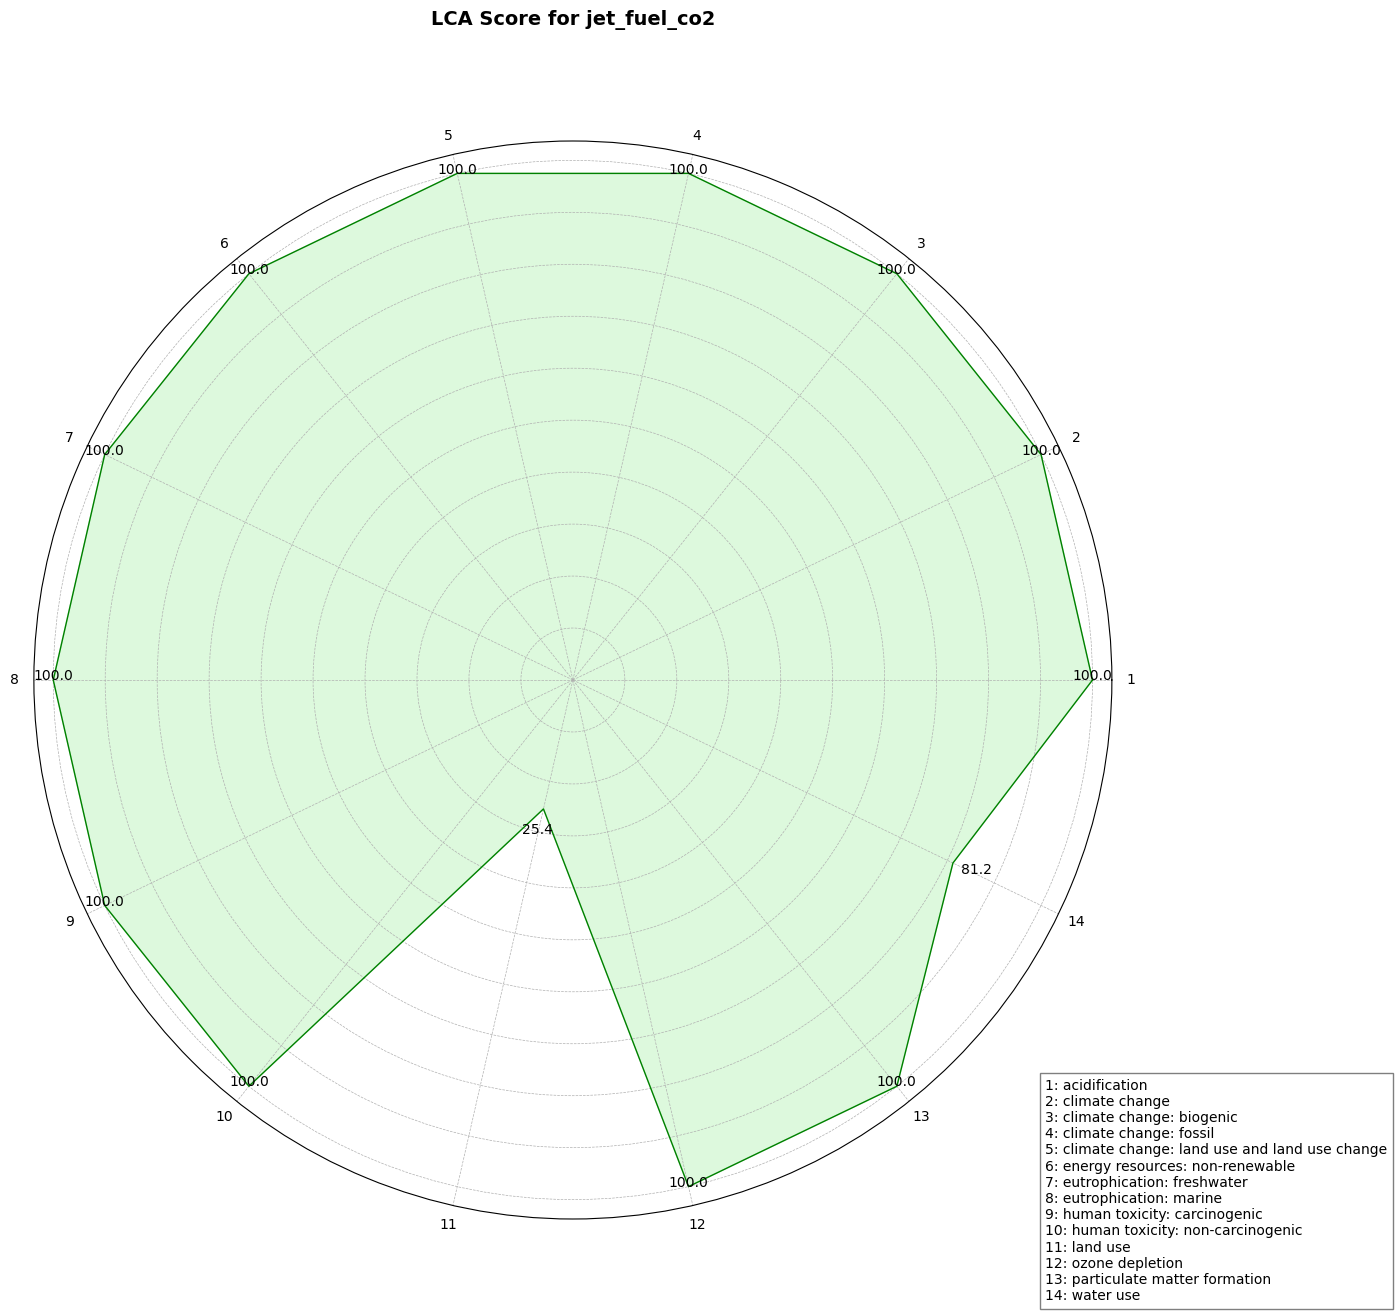

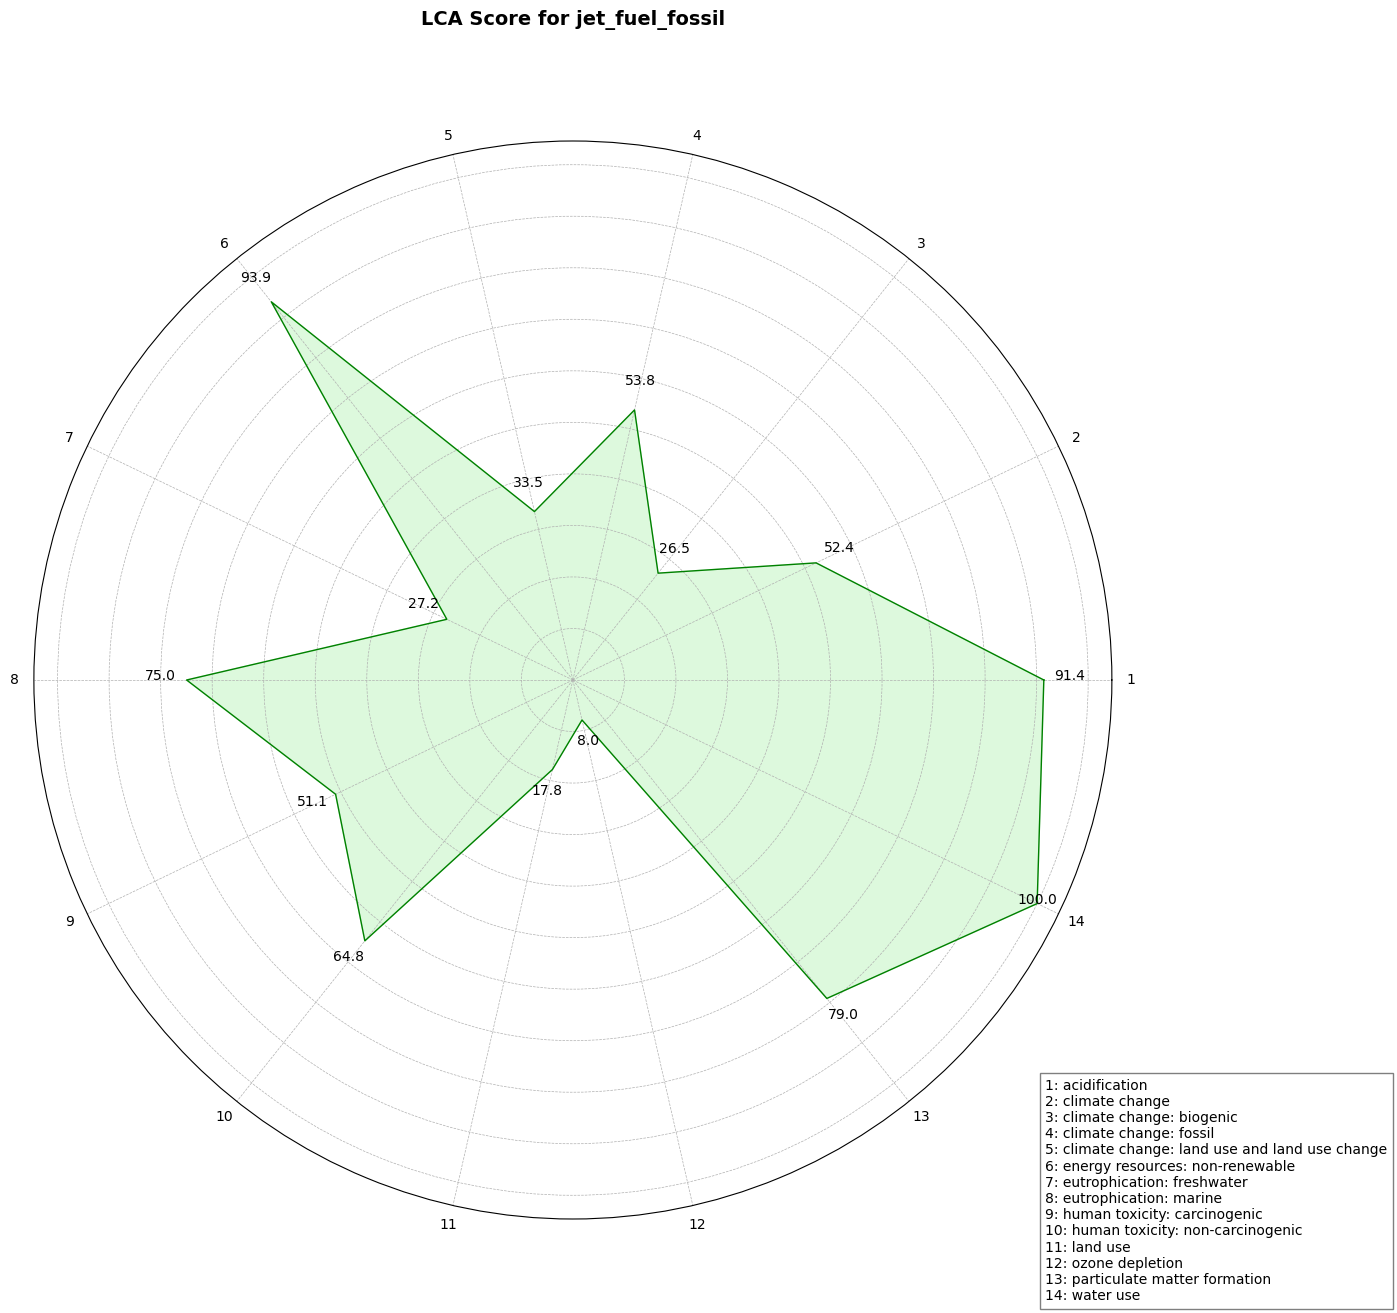

In [27]:
# Load the Excel file from the correct sheet
file_path = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\data\Filtered_MultiLCA_selected_categories _for_polarcharts.xlsx"

# Define functional units
functional_units = ["jet_fuel_bio1", "jet_fuel_bio2", "jet_fuel_bio3", "jet_fuel_co2", "jet_fuel_fossil"]

# Define functional units
functional_units = ["jet_fuel_bio1", "jet_fuel_bio2", "jet_fuel_bio3", "jet_fuel_co2", "jet_fuel_fossil"]

# Define the output directory
output_dir = r"C:\Users\matal\anaconda3\LCAs_project\lca_project_fisher\plots"
os.makedirs(output_dir, exist_ok=True)

# Iterate over each functional unit sheet
for functional_unit in functional_units:
    # Load the data from the corresponding sheet
    df = pd.read_excel(file_path, sheet_name=functional_unit, index_col=0)
    
    # Extract impact categories and scores
    categories = df.index.tolist()
    scores = df.iloc[:, 0].tolist()
    
    # Ensure scores do not exceed 100 (edge of the circle)
    scores = [min(score, 100) for score in scores]
    
    # Assign numbers to categories
    category_numbers = list(range(1, len(categories) + 1))
    category_dict = {num: cat for num, cat in zip(category_numbers, categories)}
    
    # Convert categories to angles
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    
    # Close the loop for the polar chart
    angles = np.append(angles, angles[0])  # Ensure the shape is closed
    scores.append(scores[0])  # Ensure the shape is closed
    
    # Plot the polar chart
    fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True))
    ax.fill(angles, scores, color='lightgreen', alpha=0.3)
    ax.plot(angles, scores, color='green', linewidth=1)
    
    # Add gridlines every 10 values without numbers
    ax.set_yticks(range(0, 110, 10))
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5)
    ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
    ax.set_yticklabels([])  # Remove numerical labels from the gridlines
    
    # Add values to the plot
    for angle, score, num in zip(angles[:-1], scores[:-1], category_numbers):
        ax.text(angle, min(score + 5, 100), f"{score:.1f}", horizontalalignment='center', fontsize=10, color='black')
    
    # Customize the plot
    ax.set_xticks(angles[:-1])  # Exclude duplicate first value
    ax.set_xticklabels(category_numbers, fontsize=10, rotation=45)
    ax.set_title(f"LCA Score for {functional_unit}", fontsize=14, weight='bold', y=1.1)
    
    # Add a comment explaining the category numbers inside the image
    comment_text = "\n".join([f"{num}: {cat}" for num, cat in category_dict.items()])
    plt.figtext(0.85, 0.05, comment_text, fontsize=10, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.5))
    
    # Save the polar chart
    plt.savefig(os.path.join(output_dir, f"polar_chart_{functional_unit}.png"), dpi=300, bbox_inches='tight')
    plt.show()

